In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import sklearn
import matplotlib.pyplot as plt

In [2]:
heart_data = pd.read_csv('data_cleaned.csv')
#heart_data = pd.read_csv('heart_data_train.csv').drop('Unnamed: 0',axis=1)

c:\Users\74279\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


AUC score: 0.8407
BER score: 0.4679
F1 score: 0.1233
Recall score: 0.0693
Precision score: 0.5595
Log loss: 0.2323


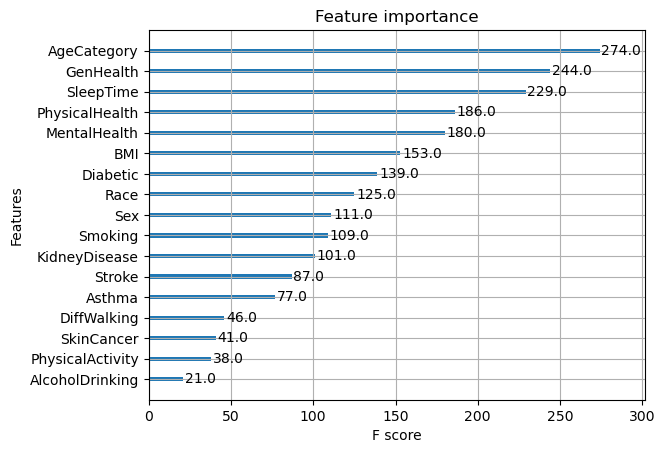

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, recall_score, precision_score, log_loss
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(['HeartDisease'], axis=1),
                                                    heart_data['HeartDisease'],
                                                    test_size=0.3,
                                                    random_state=0)

# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 8,
    'eval_metric': 'auc'
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain)

# Evaluate the model on the testing set
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate evaluation metrics
auc_score = roc_auc_score(y_test, y_pred)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
logloss = log_loss(y_test, y_pred)

# Print the evaluation metrics
print("AUC score: {:.4f}".format(auc_score))
print("BER score: {:.4f}".format(ber_score))
print("F1 score: {:.4f}".format(f1))
print("Recall score: {:.4f}".format(recall))
print("Precision score: {:.4f}".format(precision))
print("Log loss: {:.4f}".format(logloss))

# Plot the feature importance
xgb.plot_importance(model)
plt.show()

For data_cleaned.csv and with SMOTE:

c:\Users\74279\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


AUC score: 0.8141
BER score: 0.3227
F1 score: 0.3452
Recall score: 0.4735
Precision score: 0.2716
Log loss: 0.3306


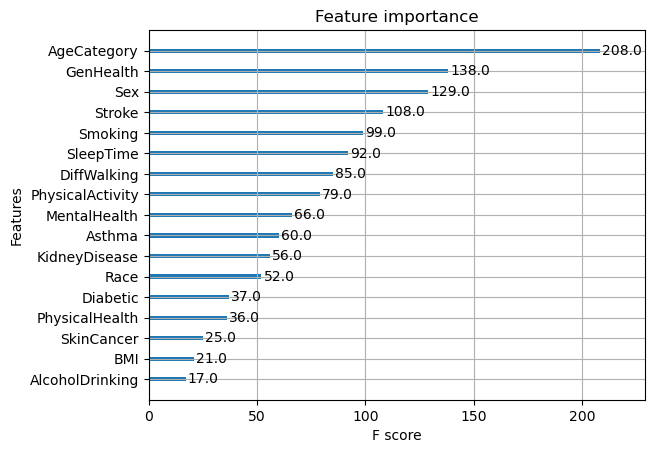

In [45]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, recall_score, precision_score, log_loss
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_data.drop(['HeartDisease'], axis=1),
                                                    heart_data['HeartDisease'],
                                                    test_size=0.3,
                                                    random_state=0)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 8,
    'eval_metric': 'auc'
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain)

# Evaluate the model on the testing set
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate evaluation metrics
auc_score = roc_auc_score(y_test, y_pred)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
logloss = log_loss(y_test, y_pred)

# Print the evaluation metrics
print("AUC score: {:.4f}".format(auc_score))
print("BER score: {:.4f}".format(ber_score))
print("F1 score: {:.4f}".format(f1))
print("Recall score: {:.4f}".format(recall))
print("Precision score: {:.4f}".format(precision))
print("Log loss: {:.4f}".format(logloss))

# Plot the feature importance
xgb.plot_importance(model)
plt.show()